# 1) Background

This is our main notebook to train the model and test within our neuromodulated system with goal-driven perception with uncertain goal identity and uncertain goal validity. 

We have modified the PyTorch implementation of EB and c-EB by Sam Greydanus (https://github.com/greydanus/excitationbp/). The code script utils.py in the current directory was modified from his package based on our own network architecture. The two code scripts including *\__*init*\__*.py in the current directory and eb_linear.py in the subdirectory called functions were directly from his package. All the rest code scripts (including load_mnist_data_pair.py, define_model.py, predict_w_cEB.py, train_n_test_model.py, show_cEB_results.py, and regulate_MNIST_pair_uncertainty.py) and two ipython notebook files (including train_n_test_results.ipynb and neuromodulated_goal_driven_perception_results.ipynb) in this entire folder were written completely by us for this project. 

For an in-depth explanation of EB and c-EB, refer to [this paper](https://arxiv.org/abs/1608.00507). Their [original code](https://github.com/jimmie33/Caffe-ExcitationBP) of EB and c-EB is in Caffe.

This ipython notebook was completely written by us, who are anonymous authors of the submitted paper under review.

In [1]:
import torch
import numpy as np
import os, sys, copy ; sys.path.append('..')
from train_n_test_model import train_model
from predict_w_cEB import get_each_ceb_accuracy
from show_cEB_results import print_all_overall_stats, show_cEB_example
from regulate_MNIST_pair_uncertainty import MNIST_uncertainty_task, plot_MNIST_uncertainty, average_probs

reseed = lambda: np.random.seed(seed=1) ; ms = torch.manual_seed(1) # for reproducibility
reseed()

if torch.cuda.is_available():
    useCuda = True
else:
    useCuda = False

print(useCuda)

False


# 2) Train the model

In [2]:
model, dataloader = train_model(total_steps = 4400,test_every = 200,test_pair_num = 2000,toTest = False)


Start to train 4400 steps, each with 256 all-combination pairs.


# 4) Neuromodulated goal-driven perception with uncertainties
Part 4 directly follows Part 2. Part 3, which is independent of Part 4, is in the other ipython notebook file named train_n_test_results.ipynb in the same directory.

In [3]:
ACH_CORRECT=1.20
ACH_INCORRECT=0.85
NE_INCORRECT=1.10
NE_CORRECT=0.85
trialRange=30
trialInterval=400
num_considered=10
num_threshold=8
hasAChLesion=False
hasNELesion=True

## 4.1: Single Valid Cue
Randomly change trial interval within the range (200+/-20) and have a single valid cue for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [4]:
alterValid=False

### 4.1.1: validity_choices=0.99

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
23/4066 = 0.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2054/4066 = 50.5% trials occurred when the predicted digit did not match the cued digit.
    389/4066 trials occurred when the predicted digit did not match the guess-target digit.
    1829/4066 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1989/4066 = 48.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4066 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 33  57  69 175 266 263   0   0   0   0], and mean of lag length (excluding consistently same cue) is 166.0


c:\python36\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


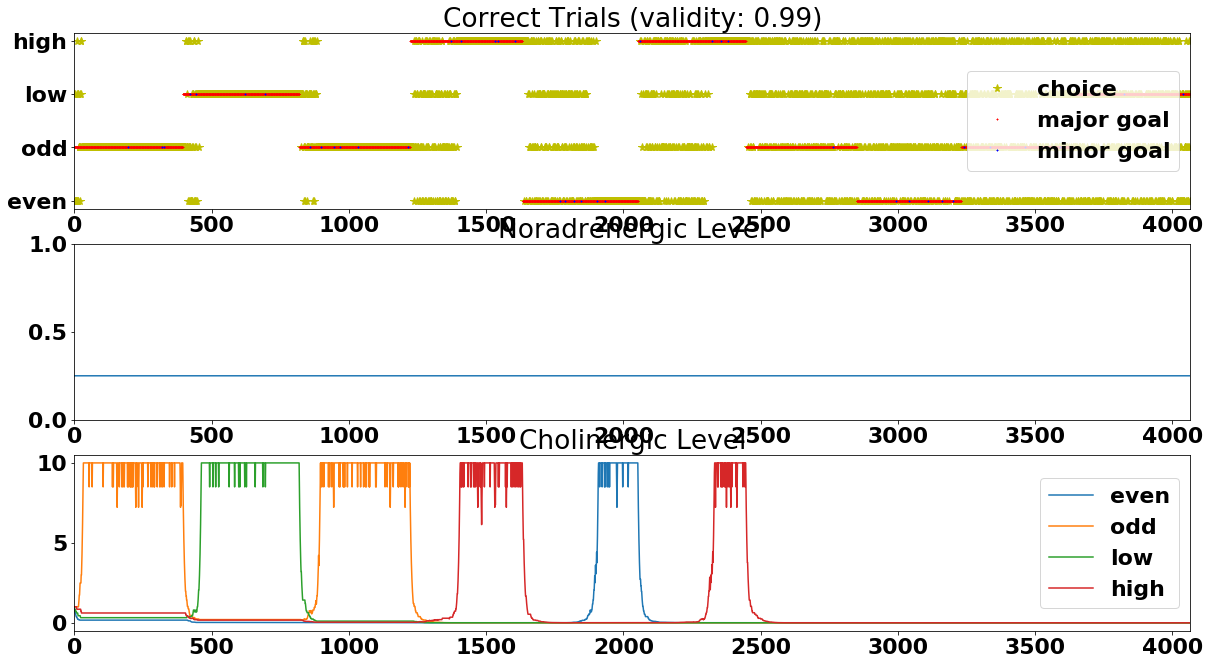

In [5]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_cues=np.array([1,2,1,3,0,3,1,0,1,2]),hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


c:\python36\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


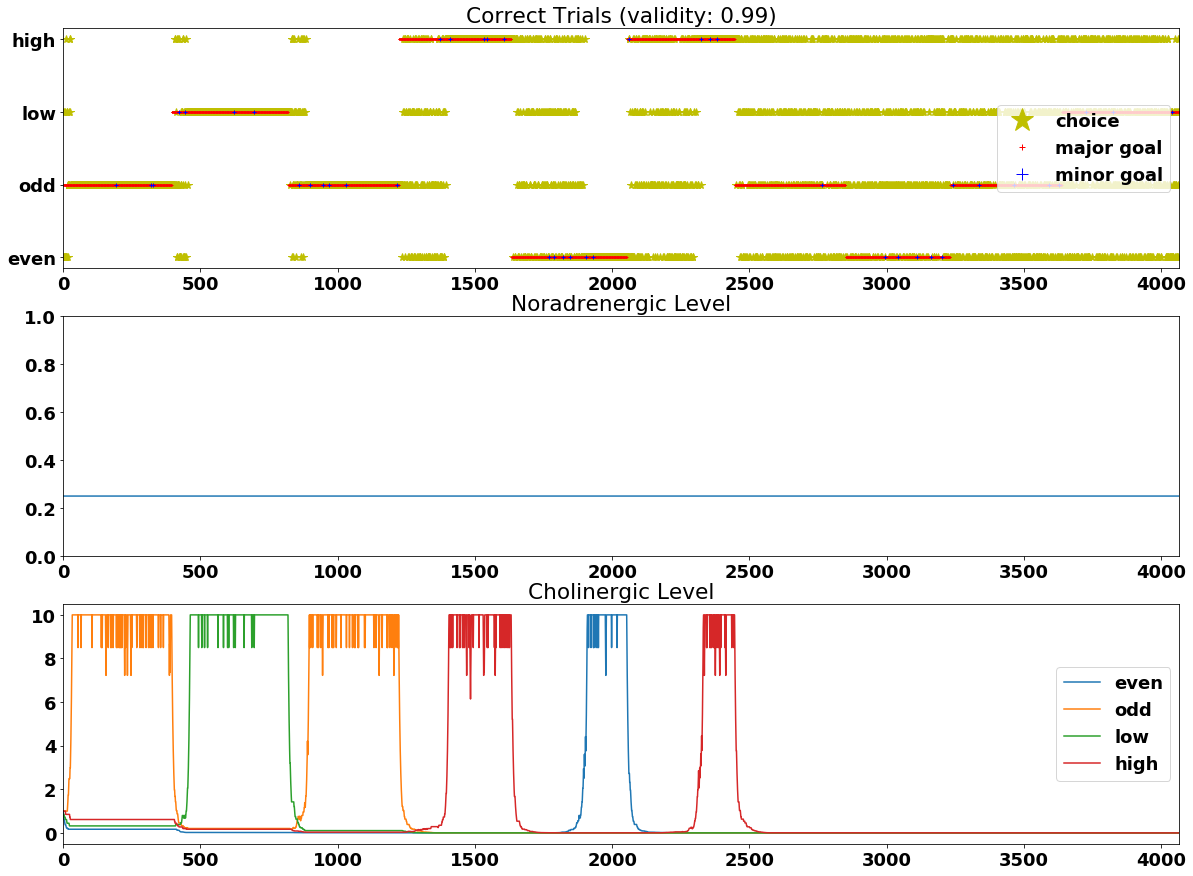

In [15]:
import matplotlib.pyplot as plt
validity_choices=0.99
moreSubplots = False
font = {'family' : 'normal', 'weight' : 'bold', 'size' : 18}
plt.rc('font', **font)

ind_cue1, = np.where(correct_lbl == 0)
ind_cue2, = np.where(correct_lbl == 1)
if moreSubplots:
    f = plt.figure(figsize=[20,18])
    plt.subplot(5,1,1)
else:
    f = plt.figure(figsize=[20,15])#plt.figure(figsize=[20,11])
    plt.subplot(3,1,1)
plt.title('Correct Trials (validity: '+str(validity_choices)+')')
plt.plot(np.arange(len(choice)),choice,'y*',markersize=8)
plt.plot(ind_cue1,correct[ind_cue1],'r+',markersize=2)
plt.plot(ind_cue2,correct[ind_cue2],'b+',markersize=4)
plt.xlim(0,len(correct))
plt.yticks(np.arange(4), ('even', 'odd', 'low', 'high'))
plt.legend(('choice', 'major goal', 'minor goal'), loc='right',markerscale=3.)

if moreSubplots:
    plt.subplot(5,1,2)
else:
    plt.subplot(3,1,2)
plt.title('Noradrenergic Level')
plt.plot(ne_level)
plt.xlim(0,len(ne_level))
plt.ylim(0,1)

if moreSubplots:
    plt.subplot(5,1,3)
    plt.title('Average Cholinergic Level')
    plt.plot(ach_avg_level)
    plt.xlim(0,len(ach_avg_level))

if moreSubplots:
    plt.subplot(5,1,4)
else:
    plt.subplot(3,1,3)
plt.title('Cholinergic Level')
plt.plot(ach_level)
plt.legend(('even', 'odd', 'low', 'high'), loc='right',markerscale=3.)
plt.xlim(0,ach_level.shape[0])

if moreSubplots:
    plt.subplot(5,1,5)
    plt.title('Action Probability')
    plt.plot(acts_prob)
    plt.legend(('even', 'odd', 'low', 'high'), loc='right',markerscale=3.)
    plt.xlim(0,acts_prob.shape[0])

plt.show()

In [ ]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
all_99_case_probs = [all_prob_99_1,all_prob_99_2,all_prob_99_3,all_prob_99_4,all_prob_99_5,\
                     all_prob_99_6,all_prob_99_7,all_prob_99_8,all_prob_99_9,all_prob_99_10]
averages_99 = average_probs(all_99_case_probs)


### 4.1.2: validity_choices=0.85

In [ ]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
all_85_case_probs = [all_prob_85_1,all_prob_85_2,all_prob_85_3,all_prob_85_4,all_prob_85_5,\
                     all_prob_85_6,all_prob_85_7,all_prob_85_8,all_prob_85_9,all_prob_85_10]
averages_85 = average_probs(all_85_case_probs)


### 4.1.3: validity_choices=0.7

In [ ]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
all_70_case_probs = [all_prob_70_1,all_prob_70_2,all_prob_70_3,all_prob_70_4,all_prob_70_5,\
                     all_prob_70_6,all_prob_70_7,all_prob_70_8,all_prob_70_9,all_prob_70_10]
averages_70 = average_probs(all_70_case_probs)


### 4.1.4: validity_choices=[0.99, 0.85, 0.70]

In [ ]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
all_multi_case_probs = [all_prob_multi_1,all_prob_multi_2,all_prob_multi_3,all_prob_multi_4,all_prob_multi_5,\
                        all_prob_multi_6,all_prob_multi_7,all_prob_multi_8,all_prob_multi_9,all_prob_multi_10]
averages_multi = average_probs(all_multi_case_probs)


## 4.2: Two Possibly Valid Cues
Randomly change trial interval within the range (200+/-20) and have two possibly valid cues for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [ ]:
alterValid=True

### 4.2.1: validity_choices=0.99

In [ ]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [ ]:
all_99a_case_probs = [all_prob_99_1a,all_prob_99_2a,all_prob_99_3a,all_prob_99_4a,all_prob_99_5a,\
                      all_prob_99_6a,all_prob_99_7a,all_prob_99_8a,all_prob_99_9a,all_prob_99_10a]
averages_99a = average_probs(all_99a_case_probs)


### 4.2.2: validity_choices=0.85

In [ ]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [ ]:
all_85a_case_probs = [all_prob_85_1a,all_prob_85_2a,all_prob_85_3a,all_prob_85_4a,all_prob_85_5a,\
                      all_prob_85_6a,all_prob_85_7a,all_prob_85_8a,all_prob_85_9a,all_prob_85_10a]
averages_85a = average_probs(all_85a_case_probs)


### 4.2.3: validity_choices=0.7

In [ ]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [ ]:
all_70a_case_probs = [all_prob_70_1a,all_prob_70_2a,all_prob_70_3a,all_prob_70_4a,all_prob_70_5a,\
                      all_prob_70_6a,all_prob_70_7a,all_prob_70_8a,all_prob_70_9a,all_prob_70_10a]
averages_70a = average_probs(all_70a_case_probs)


### 4.2.4: validity_choices=[0.99, 0.85, 0.70]

In [ ]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [ ]:
all_multia_case_probs = [all_prob_multia_1,all_prob_multia_2,all_prob_multia_3,all_prob_multia_4,all_prob_multia_5,\
                         all_prob_multia_6,all_prob_multia_7,all_prob_multia_8,all_prob_multia_9,all_prob_multia_10]
averages_multia = average_probs(all_multia_case_probs)
